In [1]:
import sys
sys.path.append('../')

import json
import gzip
import networkx as nx
from pathlib import Path
from utils.network_utils import prune, nx_graph_to_paths, load_graph_as_nx, nx_graph_to_rxn_smiles, get_pathway_stats, get_matched_buyables
from datastructs.viz_tree import VizTree

# Enumerate pathways from the MCTS network

In [2]:
d = "example"
model_name = "uspto_higher-level_consol"
max_depth = 8
num_templates = 25
target_id = 0

network_path = f"../results/mcts/results_by_target" \
                f"/{d}_{model_name}_depth{max_depth}_{num_templates}" \
                f"/target_{target_id}_result.json.gz"

G, root = load_graph_as_nx(network_path)
G = prune(G, root)

paths, _ = nx_graph_to_paths(
            G, 
            root,
            max_depth = max_depth,
            max_trees = 1000,
        )

len(paths)

29

# Evaluate/Visualize returned pathways

In [4]:
path = paths[0]
path_smi = nx_graph_to_rxn_smiles(path)
path_smi

['C=C[4CH]=O.COc1cc(C#Cc2nn([C@H]3CC[1NH]C3)c3ncnc(N)c23)cc(OC)c1>>C=CC(=O)N1CC[C@H](n2nc(C#Cc3cc(OC)cc(OC)c3)c3c(N)ncnc32)C1',
 'C1C[1NH]C[4CH2]1.COc1cc(C#Cc2n[1nH]c3ncnc(N)c23)cc(OC)c1>>COc1cc(C#Cc2nn([C@H]3CC[1NH]C3)c3ncnc(N)c23)cc(OC)c1',
 'C#Cc1n[1nH]c2ncnc(N)c12.COc1c[4cH]cc(OC)c1>>COc1cc(C#Cc2n[1nH]c3ncnc(N)c23)cc(OC)c1',
 'C#C.Nc1ncnc2[1nH]n[4cH]c12>>C#Cc1n[1nH]c2ncnc(N)c12']

In [5]:
pathway_stats = get_pathway_stats(path)
pathway_stats

{'num_chemical_nodes': 9, 'num_rxn_nodes': 4, 'depth': 3, 'max_iteration': 5}

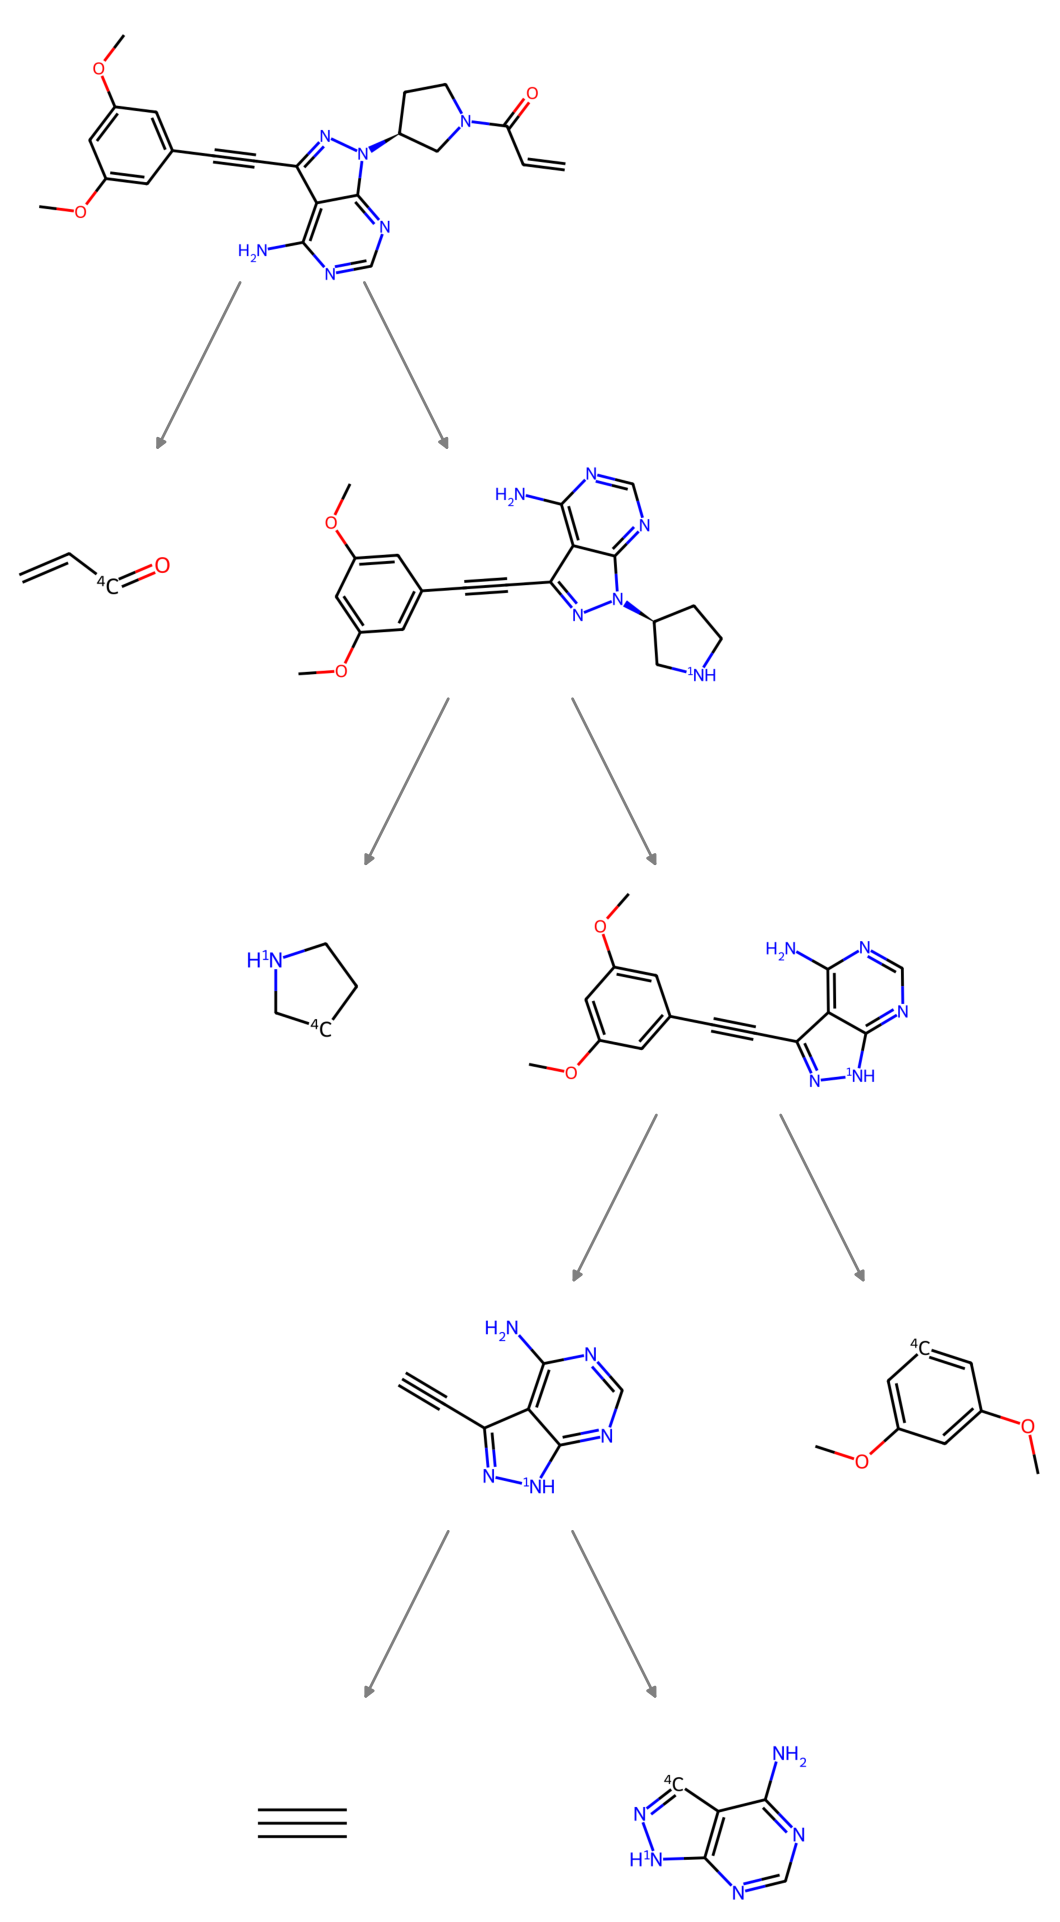

'../tree_imgs/tree_imgs/C=CC(=O)N1CC[C@H](n2nc(C#Cc3cc(OC)cc(OC)c3)c3c(N)ncnc32)C1_081330_tree.png'

In [6]:
viz_tree = VizTree(path_smi)
viz_tree.plot_tree(save_file=True)

# Search for buyable matches

Query Molecule


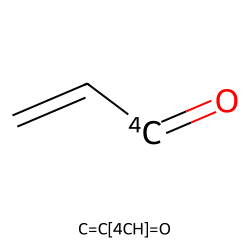

Matched Buyable Molecules


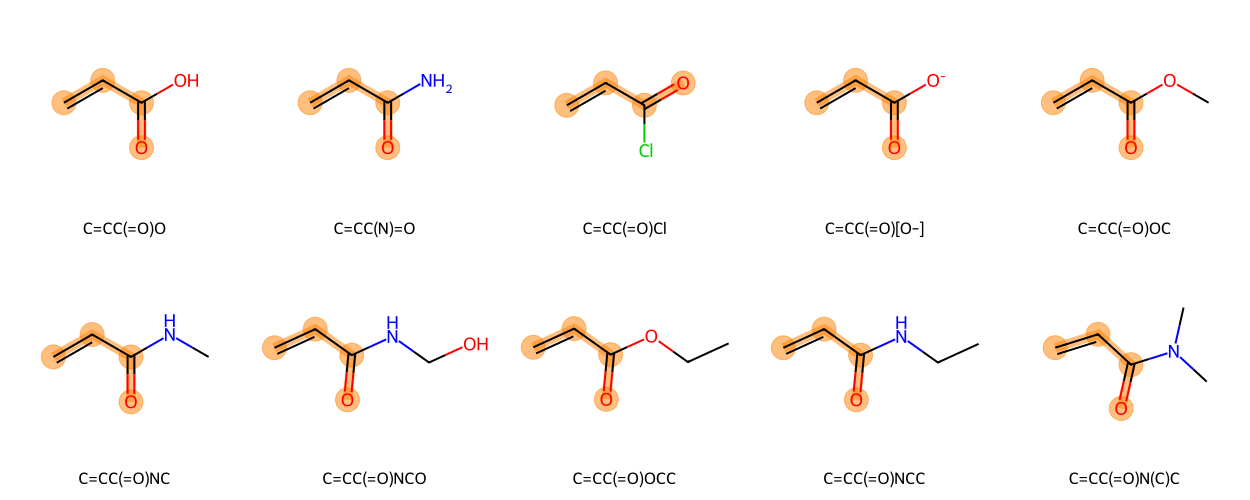

In [7]:
terminal_nodes = [
    d["smiles"] for n, d in path.nodes(data=True)
    if path.out_degree(n) == 0
]

buyables = get_matched_buyables(
    terminal_nodes[-1], 
    max_buyables=10,
    display_buyables=True
)